# Late Fusion Model - CMU-MOSI Dataset

In this notebook, we implement the Late Fusion Model, and test it on CMU-MOSI dataset.

## Importing Libraries

In [1]:
import os
import sys
import torch

import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

## Importing Helper Functions

In [2]:
from helpers.data.get_data import get_dataloader
from helpers.unimodals.common_models import GRU, MLP
from helpers.training.supervised_learning import train, test
from helpers.fusions.common_fusions import Concat
from helpers.utils.common_utils import get_default_device, save_results

## Loading the Dataset

In [3]:
traindata, validdata, testdata = get_dataloader(
    '/scratch/rrm9598/data/mosi_raw.pkl', robust_test=False, data_type='mosi')

In [4]:
device = get_default_device()
print(device)

cuda


## Model Architecture

In [5]:
encoders = [GRU(35, 70, dropout=True, has_padding=True, batch_first=True).to(device),
            GRU(74, 200, dropout=True, has_padding=True, batch_first=True).to(device),
            GRU(300, 600, dropout=True, has_padding=True, batch_first=True).to(device)]
head = MLP(870, 870, 1).to(device)

In [6]:
fusion = Concat().to(device)

## Training

In [7]:
FILE_NAME = 'mosi_lf_r0'

In [8]:
train_losses, valid_losses = train(
    encoders, fusion, head, traindata, validdata, 100, task="regression", optimtype=torch.optim.AdamW,
    early_stop=False, is_packed=True, lr=1e-3, save=f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/models/{FILE_NAME}.pt', 
    weight_decay=0.01, objective=torch.nn.L1Loss()
)

Epoch [1/100]
Train Loss: 1.1627
Valid Loss: 1.1841
Saving Best

Epoch [2/100]
Train Loss: 0.9498
Valid Loss: 1.1025
Saving Best

Epoch [3/100]
Train Loss: 0.8599
Valid Loss: 1.0336
Saving Best

Epoch [4/100]
Train Loss: 0.8178
Valid Loss: 0.9631
Saving Best

Epoch [5/100]
Train Loss: 0.7314
Valid Loss: 0.9184
Saving Best

Epoch [6/100]
Train Loss: 0.6660
Valid Loss: 0.9861

Epoch [7/100]
Train Loss: 0.6252
Valid Loss: 0.9293

Epoch [8/100]
Train Loss: 0.5926
Valid Loss: 0.9898

Epoch [9/100]
Train Loss: 0.5541
Valid Loss: 0.9332

Epoch [10/100]
Train Loss: 0.4970
Valid Loss: 0.9177
Saving Best

Epoch [11/100]
Train Loss: 0.4794
Valid Loss: 0.9582

Epoch [12/100]
Train Loss: 0.4367
Valid Loss: 0.9904

Epoch [13/100]
Train Loss: 0.4371
Valid Loss: 0.9196

Epoch [14/100]
Train Loss: 0.3732
Valid Loss: 0.9802

Epoch [15/100]
Train Loss: 0.3579
Valid Loss: 0.9451

Epoch [16/100]
Train Loss: 0.3334
Valid Loss: 0.9958

Epoch [17/100]
Train Loss: 0.3216
Valid Loss: 0.9878

Epoch [18/100]
Trai

Text(0.5, 1.0, 'Loss vs. No. of epochs')

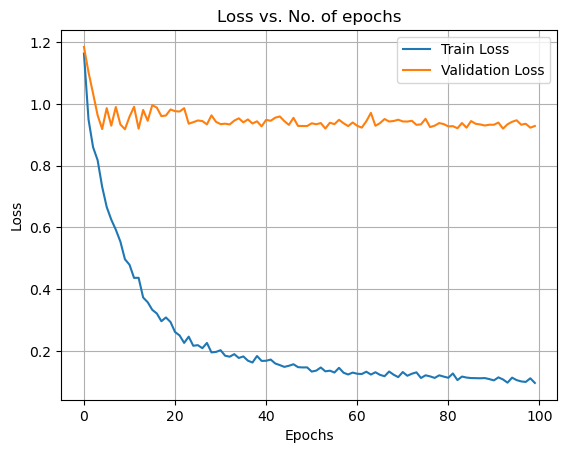

In [9]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss vs. No. of epochs')

In [10]:
save_results(train_losses, valid_losses, f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/results/{FILE_NAME}.pkl')

## Testing

In [11]:
model = torch.load(f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/models/{FILE_NAME}.pt').to(device)

test(model, test_dataloaders_all=testdata, dataset='mosi', is_packed=True,
     criterion=torch.nn.L1Loss(), task="posneg-classification", no_robust=True)

Recall: 70.5793% | Total Accuracy: 70.2624%
Inference Time: 572ms
Inference Params: 2570311
